## Comparing the Performance of a Multilayer Perceptron Classifier and Random Forest Classifier When Detecting Pulsar Candidates From Sky Survey Data.
<br>

**Eric Newnam**  
CSC-478 Programming Machine Learning Applications  
Winter 2018  

The multilayer perceptron (MLP) classifier is an algorithm that leverages many artificial "neurons" in its construction, configured in multiple layers. We will execute a series of structured, orderly changes and observe the effects on certain metrics, while gaining an intuitive understanding of the results when invoking certain high-level, or "hyper" parameters. We will plot the changes in resulting true positive rate (recall), precision, and f1-score as a function of the parameter settings. We will then run a random forest classifier on the same data and observe the predictive performance of both algorithms. 

### Summary

We began with a dimensionality reduction in order to visualize the 8-dimensional data space, reduced down to 3 principal components containing the majority of the original variance, plotted onto a 3-dimensional set of axes. The 2 classes were discernable as a set of 2 separate sweeping forms along the directions of maximum variance, and served to provide an intuitive understanding of the separation between the 2 classes contained within the dataset.

After normalizing the 8 input features using a min-max scaling, we ran a series of MLP classifiers, from 1 hidden layer to 3 hidden layers. Each run was tested using a model configured with a rectified linear unit (ReLU) activation function, with the final output neuron using the sigmoid function for binary classification, afterward examining the resulting true positive rate (recall) and moving forward with the setting with the highest recall and f1-score. The loss function used was binary cross entropy and was minimized using the Adam algorithm. The resulting model contained 3 hidden layers, with a configuration of (9, 8, 3) and associated parameters. The model was able to discern, out of 4,475 out-of-sample testing observations, 366 pulsar examples correctly, and only miss 58 candidates. We then compared the results of the neural network with a random forest classifier. The neural network was able to achieve a higher level of true positive predictions with this problem.  

The classification report showed a precision of 0.89, recall of 0.86, and an f1-score of 0.88.
```
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4051
          1       0.89      0.86      0.88       424

avg / total       0.98      0.98      0.98      4475
```


### Dataset Information

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). The dataset was obtained through the UCI machine learning repository.

*[From the UCI Machine Learning Repository description:](https://archive.ics.uci.edu/ml/datasets/HTRU2)*

*Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. *

*As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes. *

*Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation. Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find. *

*Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted, which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a **minority positive class**, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation. *

**_Feature Information_**

*Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile. This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency. The remaining four variables are similarly obtained from the Delta Modulation-Signal to Noise Ratio (DM-SNR) curve. Delta modulation is a technique for analog-to-digital and digital-to-analog signal conversion. These are summarised below: *

1. Mean of the integrated profile. 
2. Standard deviation of the integrated profile. 
3. Excess kurtosis of the integrated profile. 
4. Skewness of the integrated profile. 
5. Mean of the DM-SNR curve. 
6. Standard deviation of the DM-SNR curve. 
7. Excess kurtosis of the DM-SNR curve. 
8. Skewness of the DM-SNR curve. 
9. Class label (1 = pulsar, 0 = noise)

### Methodology

After importing the data, we will need to perform min/max scaling of the features, as the perceptron-based models are sensitive to disparate scales between features and the corresponding active range of their activation functions during training. We have used both the ReLU and the sigmoid. The dataset will be split into a training and testing set, with a randomized 75/25 split.

We will begin with 1 hidden layer, with the number of neurons chosen by a rule-of-thumb heuristic, graphing the resulting recall and f1-scores scores, with additional importance placed on the recall, as we will be placing greater importance on the detection of the labels of a minority positive class. We will then repeat the process for the next several layers.  

We will use NumPy arrays as our primary data structure, and the tensorflow implementation of the MLP Classifier for our calculations, using the high-level Keras python interface. The NumPy arrays are _true, contiguous memory arrays_, able to be accessed in constant O(1) time, and are efficiently used for large matrix calculations such as needed for an artificial neural network. 

We will begin by compiling and instantiating the MLP Classifier. Each neuron of the input layer will correspond to a feature of the input dataset. Being a binary classification problem, we will use a single output neuron as the output layer, giving us a probability of being 0 or 1. There are numerous hyperparameters to be set when setting up an MLP, we will be primarily interested in the following:
- **activation**: The activation function at each neuron, producing its output as as the mapping of a continuous real number to a range of 0 to 1 (with ReLU or sigmoid).
- **hidden layer sizes**: The number of neurons per layer, the input (8 neurons) and output (1 neuron) will already be set by our dataset. 
- **optimizer**: The optimizer seeks to perform the minimization of the loss function, we will be using the Adam, which is a stochastic gradient-based optimizer. 
- **loss**: With our implementation of the MLP, the loss function is binary cross entropy.
- **Sequential**: The model is a feed forward design, with densely connected layers.
- **Dense**: The layers of the model will be instantiated as densely connected layers, each neuron will be connected to each neuron of the following hidden layer.  

Finally, we will then run the random forest classifier on the dataset. The random forest algorithm is robust against overfitting. Although they leverage the ability of decision trees to fit training data very well, the use of a random subset of training features produces a set of decision trees that will be distinctly random from one another. This will ensure that the trees are not highly correlated, and the use of "bagging" (bootstrap aggregation) as part of the random forest algorithm ensures that the high variance of the standard decision tree algo is also mitigated.  

A series of random forest classifiers will be fitted and analyzed for their respective predictive power. The criteria of **Gini** and **Entropy** will be tried.  

The performance of this random forest will be finally compared with the best-performing neural network's performance metrics.  

### Citation

R. J. Lyon, B. W. Stappers, S. Cooper, J. M. Brooke, J. D. Knowles, Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach, Monthly Notices of the Royal Astronomical Society 459 (1), 1104-1123, DOI: 10.1093/mnras/stw656 

In [2]:
import numpy as np
import pandas as pd
import random as rn
import os
import tensorflow as tf

# The below is necessary to have reproducible behavior
# with our random number generation below
os.environ['PYTHONHASHSEED'] = '0'
np.random.seed(123)
rn.seed(123)

# Force TensorFlow to use single thread to further have reproducibilty
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
from keras import backend as K
tf.set_random_seed(123)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import layers
from keras.callbacks import Callback
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

We will begin by importing the csv text file into a dataframe object. The features will be manually named according to the feature list above.

In [3]:
features = ['mean_integ_profile', 
            'sd_integ_profile', 
            'excess_kurtosis_integ_profile', 
            'skewness_integ_profile', 
            'mean_DM-SNR_curve', 
            'sd_DM-SNR_curve', 
            'excess_kurtosis_DM-SNR_curve', 
            'skewness_DM-SNR_curve', 
            'label']
pulsar_df = pd.read_csv('HTRU2_data/HTRU_2.csv', names=features)

In [4]:
pulsar_df.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve,label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [5]:
pulsar_df.shape

(17898, 9)

We have 17,898 observations in our dataframe. Before we split the dataset into the feature set and the class label, we will first check for NaN or NULL values, as well as typecheck the dataset.

In [6]:
pulsar_df.dtypes

mean_integ_profile               float64
sd_integ_profile                 float64
excess_kurtosis_integ_profile    float64
skewness_integ_profile           float64
mean_DM-SNR_curve                float64
sd_DM-SNR_curve                  float64
excess_kurtosis_DM-SNR_curve     float64
skewness_DM-SNR_curve            float64
label                              int64
dtype: object

In [7]:
pulsar_df.isnull().values.any()

False

Split the original dataset into a matrix **X**, and a vector **Y**:

In [8]:
pulsar_df_X = pulsar_df.loc[:, 'mean_integ_profile':'skewness_DM-SNR_curve']
pulsar_df_Y = pulsar_df.loc[:, 'label']

In [9]:
pulsar_df_X.head()

,mean_integ_profile,sd_integ_profile,excess_kurtosis_integ_profile,skewness_integ_profile,mean_DM-SNR_curve,sd_DM-SNR_curve,excess_kurtosis_DM-SNR_curve,skewness_DM-SNR_curve
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306


In [10]:
pulsar_df_Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

### Plot the boxplots:

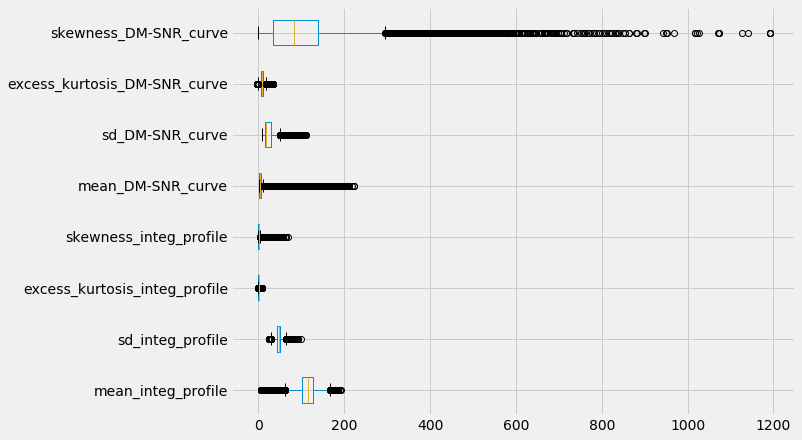

In [11]:
feat = ['mean_integ_profile', 
        'sd_integ_profile', 
        'excess_kurtosis_integ_profile', 
        'skewness_integ_profile', 
        'mean_DM-SNR_curve', 
        'sd_DM-SNR_curve', 
        'excess_kurtosis_DM-SNR_curve', 
        'skewness_DM-SNR_curve']
plt.style.use('fivethirtyeight')
pulsar_df[feat].boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

Most of our features are showing right-skewness, with the exception of the mean of the integrated profile. All features show data points lying well outside of their inter-quartile ranges, especially above 1.5 x IQR. Seeing that this mostly appears in the latter 4 features taken from the DM-SNR curve, this may be an artifact of the curve, as the previous 4 features taken from the integrated profile do not show the skewness to the same amount. 

Perform a random split of our dataset into a training and testing set. The ratio used is 0.75 for the training set and 0.25 for testing:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(pulsar_df_X, pulsar_df_Y, random_state=123)

In [13]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(13423, 8)
(13423,)
(4475, 8)
(4475,)


### Scale the features of our "X" dataframes:
- Scaled to the range continuous between 0 and 1.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Take a look at the first 5 rows of the data matrix:

In [15]:
X_train[0:5, :]

array([[0.61938214, 0.37618228, 0.17517469, 0.01999068, 0.01200134,
        0.09602715, 0.33231736, 0.09550557],
       [0.55755396, 0.30498195, 0.22026633, 0.02346323, 0.02366385,
        0.20612431, 0.2314234 , 0.03088694],
       [0.4988997 , 0.11947861, 0.22604033, 0.07154638, 0.00164792,
        0.01073479, 0.72349037, 0.57862406],
       [0.70414727, 0.3219762 , 0.15981134, 0.02640718, 0.00962956,
        0.09565007, 0.356493  , 0.10831849],
       [0.5368176 , 0.13730774, 0.23094246, 0.05518797, 0.00351146,
        0.04815535, 0.46174504, 0.19524722]])

### Plot the boxplots with the scaled features:

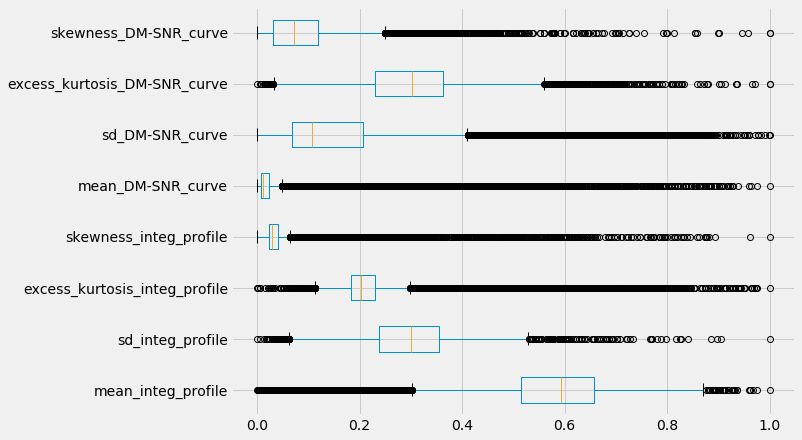

In [16]:
plt.style.use('fivethirtyeight')
plt_df = pd.DataFrame(data=X_train, columns=feat)
plt_df.boxplot(figsize=(9,7), sym='o', vert=False, rot=0)
plt.show()

We now have 13,423 training observations and 4,475 testing observations, each with 8 feature columns, each feature is now scaled to the range of 0 to 1, bringing the feature values much closer to the active range of the activation function we will be using with these perceptrons.

## Reducing the Dimensionality and Visualizing the Data:

We will perform a dimensionality reduction before visualizing the data points in 3D, reducing our dimensions from 8 down to 3:
- Can we discern visually, an intuitive sense of both classes of data as clusters: both the positive and the negative examples?
- Is there a visible formal differentiation between two groups of datapoints that is obvious?
- We will capture the maximum variance explained within 3 principal components and plot them along 3 axes.

In [17]:
from sklearn.decomposition import PCA

pca_3 = PCA(n_components=3, random_state=123)
pca_3.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=123,
  svd_solver='auto', tol=0.0, whiten=False)

In [18]:
p3_train = pca_3.transform(X_train)
p3_test = pca_3.transform(X_test)

- Create a 3-dimensional scatterplot of the dimensionally-reduced data points:

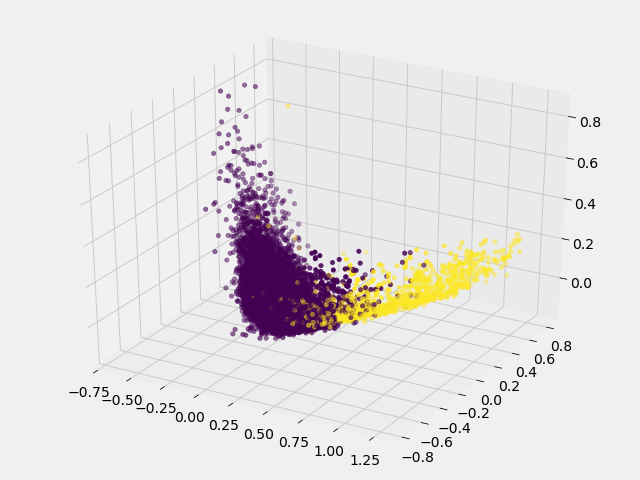

In [19]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(p3_train[:, 0]).flatten()
y_ax = np.array(p3_train[:, 1]).flatten()
z_ax = np.array(p3_train[:, 2]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = Y_train, marker = 'o')
plt.show()

- Here, the yellow datapoints represent the positive examples, and the purple datapoints represent the majority negative class of radio-frequency noise and spurious examples.
- Rotating the axes, providing another view of the plotted datapoints:

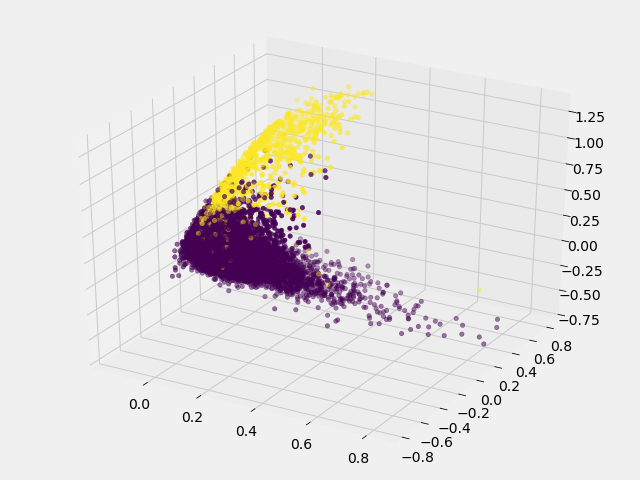

In [20]:
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111, projection = '3d')
x_ax = np.array(p3_train[:, 2]).flatten()
y_ax = np.array(p3_train[:, 1]).flatten()
z_ax = np.array(p3_train[:, 0]).flatten()
ax.scatter(x_ax, y_ax, z_ax, c = Y_train, marker = 'o')
plt.show()

After reducing the original 8 features down to a set of 3 components that capture the majority of the original variance within the original datapoints, we can see that there is a definite, discernable difference between 2 separate classes, even within this dimensionally-reduced space. Here, the 2 classes have been colored as purple and yellow by the ground truth labels (0 or 1), and show a difference in their respective forms within this reduced data space. The 2 classes appear as 2 sweeping "arms" reaching out into opposite directions. There may be a potential for misclassification at the junction of these dense clusters. 

### The correlation matrix

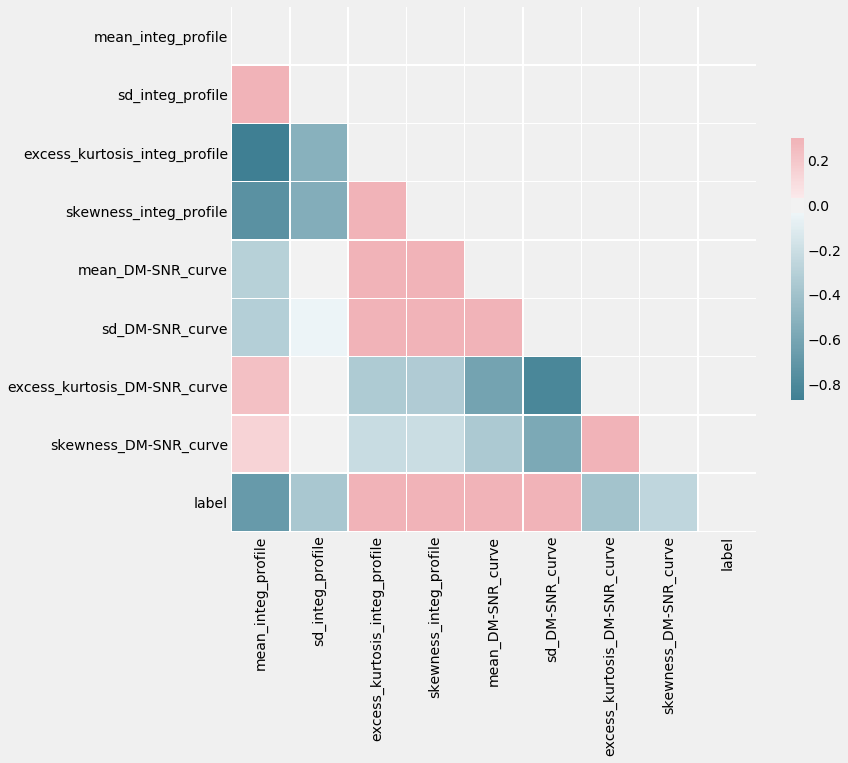

In [21]:
# compute the correlation matrix
corr = pulsar_df.loc[:, features].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))

# generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Looking at the correlation matrix, we see that the initial 4 statistics features obtained from the integrated pulse profile, the **mean_integ_profile, sd_integ_profile, excess_kurtosis_DM-SNR_curve,** and the **skewness_DM-SNR_curve** are showing a negative correlation to the response variable, with the mean_integ_profile showing the strongest correlation.  

The **excess_kurtosis_integ_profile, skewness_integ_profile, mean_DM-SNR_curve,** and the **sd_DM-SNR_curve** are all showing a relatively weak positive correlation with the response variable **label**.  

We also should keep in mind the distribution of the negative and positive labels, as the negative samples far outnumber the positive examples. The true positive rate will probably become the most important metric with the judgement of our results. 

### Define a custom class for collating the running f1-score and recall:
- We can access these metrics later by calling metrics.val_f1s, etc. with the **callbacks** argument with the fit() method. 
- This custom class is based on the code in this [article by Thong Nguyen](https://medium.com/@thongonary/how-to-compute-f1-score-for-each-epoch-in-keras-a1acd17715a2). 
- Slightly modified for use with the latest version of Keras. 

In [22]:
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        return

## Determine the number of hidden layers:

### Model 1: Single hidden layer of 9 neurons:
- Hidden layer: activation function: **ReLU** / Optimizer: **Adam** algorithm.
- Output layer: activation function: **Sigmoid**
- Loss function: **Cross Entropy**
- 200 epochs  

Using an initial rule-of-thumb estimate for the number of neurons in our initial hidden layer as a number between the size of the input layer and the size of the output layer. We will choose 9:

In [22]:
metrics1 = Metrics()
mlp_classifier1 = Sequential()

# create the hidden layer of 9
mlp_classifier1.add(Dense(9, input_dim=8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the output layer of 1 unit
mlp_classifier1.add(Dense(1, activation='sigmoid'))

# compile using tensorflow backend
mlp_classifier1.compile(optimizer='adam', 
                        loss='binary_crossentropy')

mlp_classifier1.fit(X_train, Y_train, batch_size=100, epochs=200, 
                    verbose=0, callbacks=[metrics1], 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

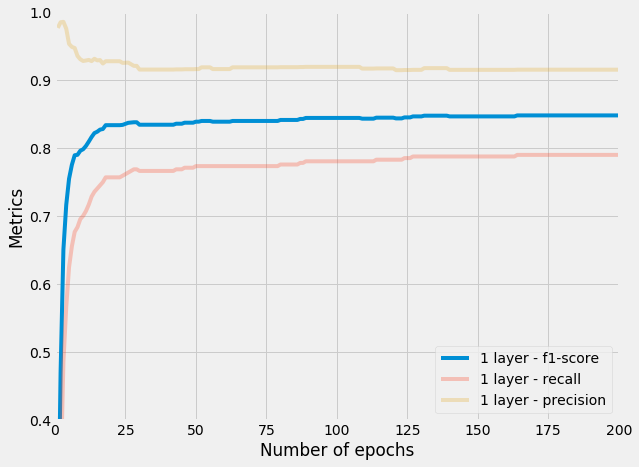

In [23]:
plt.figure(figsize=(9, 7))
plt.style.use('fivethirtyeight')
x_units = list(range(1, 201))
plt.plot(x_units, metrics1.val_f1s, label='1 layer - f1-score')
plt.plot(x_units, metrics1.val_recalls, label='1 layer - recall', alpha=0.3)
plt.plot(x_units, metrics1.val_precisions, label='1 layer - precision', alpha=0.3)
plt.axis([0, 200, 0.4, 1.0])
plt.xlabel('Number of epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [24]:
y_hat1 = mlp_classifier1.predict(X_test)
y_hat1 = (y_hat1 > 0.5).astype(np.int)
print(confusion_matrix(Y_test, y_hat1))

[[4020   31]
 [  89  335]]


Examining the graph of the f1-score and recall score as a function of our number of epochs, we see that the initial increase in our metrics occurrs within the first 25 training epochs (25 passes through the training data). After approximately epoch 25, the increase in f1-score levels out, although still increases slowly. The 1 layer model appears to reach a top f1-score of approximately 0.85 by the end of our training process. Having 1 hidden layer of 9 neurons appears to allow us to capture and learn a significant amount about the dataset.  

The confusion matrix shows that the model has classified **335 observations correctly as positive** pulsar examples, **4,020 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **89 observations falsely predicted as negative,** and **31 observations falsely predicted as positive.**  

Using 2 hidden layers will allow the model to learn more complex functions that may describe the data more closely. We will try training model 2, containing 2 hidden layers and we will examine the resulting training performance and validation metrics. Layer 2 will contain 8 neurons.  

### Model 2: Two hidden layers of 9 and 8 neurons:
- Hidden layer: activation function: **ReLU** / Optimizer: **Adam** algorithm.
- Output layer: activation function: **Sigmoid**
- Loss function: **Cross Entropy**
- 200 epochs

In [25]:
metrics2 = Metrics()
mlp_classifier2 = Sequential()

# create the first hidden layer of 9
mlp_classifier2.add(Dense(9, input_dim=8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the second hidden layer of 8
mlp_classifier2.add(Dense(8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the output layer of 1 unit
mlp_classifier2.add(Dense(1, activation='sigmoid'))

# compile using tensorflow backend
mlp_classifier2.compile(optimizer='adam', 
                        loss='binary_crossentropy')

mlp_classifier2.fit(X_train, Y_train, batch_size=100, epochs=200, 
                    verbose=0, callbacks=[metrics2], 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

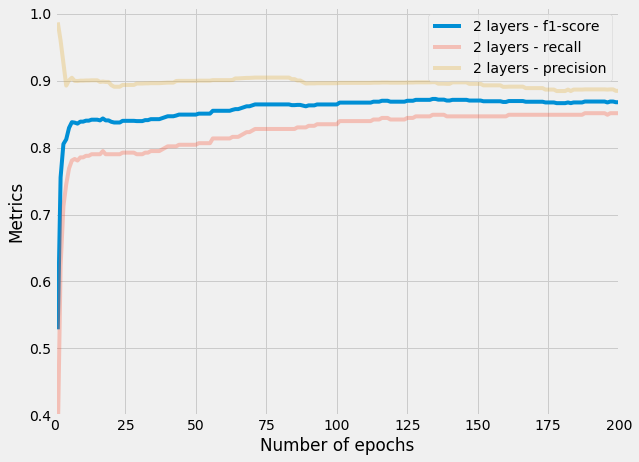

In [26]:
plt.figure(figsize=(9, 7))
x_units = list(range(1, 201))
plt.plot(x_units, metrics2.val_f1s, label='2 layers - f1-score')
plt.plot(x_units, metrics2.val_recalls, label='2 layers - recall', alpha=0.3)
plt.plot(x_units, metrics2.val_precisions, label='2 layers - precision', alpha=0.3)
plt.axis([0, 200, 0.4, 1.01])
plt.xlabel('Number of epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [27]:
y_hat2 = mlp_classifier2.predict(X_test)
y_hat2 = (y_hat2 > 0.5).astype(np.int)
print(confusion_matrix(Y_test, y_hat2))

[[4004   47]
 [  63  361]]


There is a marked increase in learning ability with the 2 layer model, especially visible when more training iterations are performed. Examining the graph, we see that the initial increase in our metrics occurrs within the first 5 training epochs. After approximately epoch 5, the increase in f1-score slows down, although still increases slowly. The 2 layer model appears to reach a top **f1-score of 0.87** at epoch 133, although recall still increases all the out to epoch 200, with a **recall score of 0.85.** Having 2 hidden layers of 9 and 8 neurons appears to allow us to capture and learn significantly more about the dataset than the single hidden layer model.  

The confusion matrix shows that the model has classified **361 observations correctly as positive** pulsar examples, **4,004 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **63 observations falsely predicted as negative,** and **47 observations falsely predicted as positive.**  

Although there may not be any theoretical advantage to using more than 2 hidden layers, we will try a third layer of 3 neurons with model 3, and examine the resulting training performance and validation metrics.  

In [28]:
metrics2.val_f1s[133]

0.8727272727272728

In [29]:
metrics2.val_recalls[199]

0.8514150943396226

### Model 3: Three hidden layers of 9, 8, and 3 neurons:
- Hidden layer: activation function: **ReLU** / Optimizer: **Adam** algorithm.
- Output layer: activation function: **Sigmoid**
- Loss function: **Cross Entropy**
- 200 epochs

In [31]:
metrics3 = Metrics()
mlp_classifier3 = Sequential()

# create the first hidden layer of 9
mlp_classifier3.add(Dense(9, input_dim=8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the second hidden layer of 8
mlp_classifier3.add(Dense(8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the third hidden layer of 3
mlp_classifier3.add(Dense(3, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the output layer of 1 unit
mlp_classifier3.add(Dense(1, activation='sigmoid'))

# compile using tensorflow backend
mlp_classifier3.compile(optimizer='adam', 
                        loss='binary_crossentropy')

mlp_classifier3.fit(X_train, Y_train, batch_size=100, epochs=200, 
                    verbose=0, callbacks=[metrics3], 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

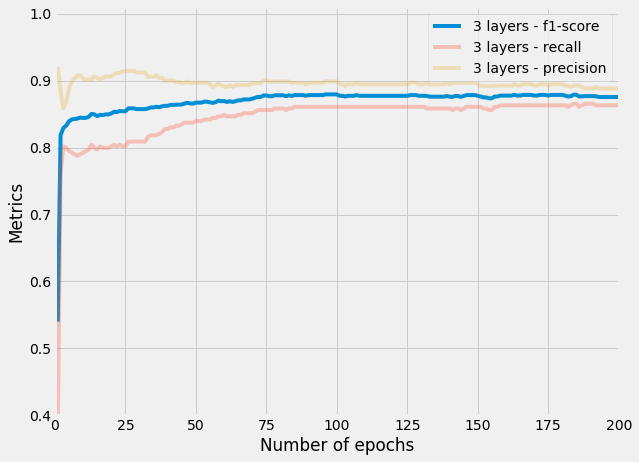

In [32]:
plt.figure(figsize=(9, 7))
x_units = list(range(1, 201))
plt.plot(x_units, metrics3.val_f1s, label='3 layers - f1-score')
plt.plot(x_units, metrics3.val_recalls, label='3 layers - recall', alpha=0.3)
plt.plot(x_units, metrics3.val_precisions, label='3 layers - precision', alpha=0.3)
plt.axis([0, 200, 0.4, 1.01])
plt.xlabel('Number of epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [33]:
y_hat3 = mlp_classifier3.predict(X_test)
y_hat3 = (y_hat3 > 0.5).astype(np.int)
print(confusion_matrix(Y_test, y_hat3))

[[4005   46]
 [  58  366]]


There is a marked increase in learning speed with the 3 layer model, as the convergence appears to happen between epoch 75 to 100. We see that the initial increase in our metrics occurrs immediately within the first few training epochs, then appears to converge at its maximum shortly after epoch 75. The 3 layer model appears to reach a top **f1-score of 0.88** at epoch 95, with a top **recall score of 0.865** at epoch 183. The 3 layer model does show a minimal increase in predictive performance, although slight, it is noticeable when looking at the confusion matrix.  

The confusion matrix shows that the model has classified **366 observations correctly as positive** pulsar examples, **4,005 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **58 observations falsely predicted as negative,** and **46 observations falsely predicted as positive.**  

In [34]:
metrics3.val_f1s[95]

0.8795180722891566

In [35]:
metrics3.val_recalls[183]

0.8655660377358491

### Model 4: Three hidden layers of 9, 8, and 3 neurons with dropout:
- Add **Dropout** (0.2)
- Hidden layer: activation function: **ReLU** / Optimizer: **Adam** algorithm.
- Output layer: activation function: **Sigmoid**
- Loss function: **Cross Entropy**
- 200 epochs

In [38]:
metrics4 = Metrics()
mlp_classifier4 = Sequential()

# create the first hidden layer of 9
mlp_classifier4.add(Dense(9, input_dim=8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# add dropout
mlp_classifier4.add(Dropout(0.2))

# create the second hidden layer of 8
mlp_classifier4.add(Dense(8, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

mlp_classifier4.add(Dropout(0.2))

# create the third hidden layer of 3
mlp_classifier4.add(Dense(3, 
                          activation='relu', 
                          use_bias=True, 
                          kernel_initializer='glorot_uniform', 
                          bias_initializer='zeros', 
                          kernel_regularizer=None))

# create the output layer of 1 unit
mlp_classifier4.add(Dense(1, activation='sigmoid'))

# compile using tensorflow backend
mlp_classifier4.compile(optimizer='adam', 
                        loss='binary_crossentropy')

mlp_classifier4.fit(X_train, Y_train, batch_size=100, epochs=200, 
                    verbose=0, callbacks=[metrics4], 
                    validation_data=(X_test, Y_test), 
                    shuffle=False)

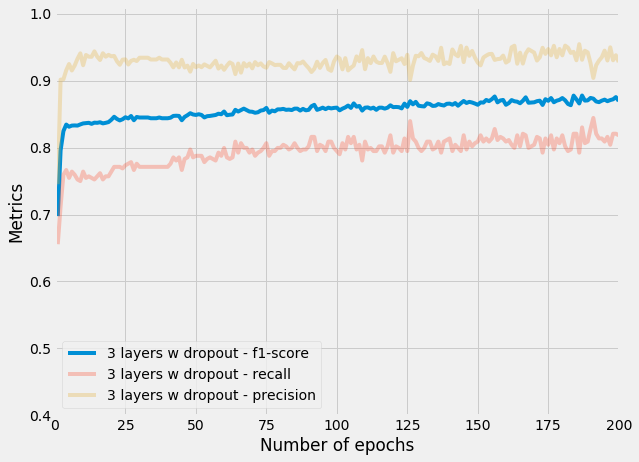

In [39]:
plt.figure(figsize=(9, 7))
plt.plot(x_units, metrics4.val_f1s, label='3 layers w dropout - f1-score')
plt.plot(x_units, metrics4.val_recalls, label='3 layers w dropout - recall', alpha=0.3)
plt.plot(x_units, metrics4.val_precisions, label='3 layers w dropout - precision', alpha=0.3)
plt.axis([0, 200, 0.4, 1.01])
plt.xlabel('Number of epochs')
plt.ylabel('Metrics')
plt.legend()
plt.show()

In [40]:
y_hat4 = mlp_classifier4.predict(X_test)
y_hat4 = (y_hat4 > 0.5).astype(np.int)
print(confusion_matrix(Y_test, y_hat4))

[[4024   27]
 [  77  347]]


We may not have enough neurons with the model to benefit from adding dropout, as this model appears to show no increase in performance, and the dropout appears to have added a noisy character to the resulting training performance graph. The 3 layer model with dropout appears to reach a top **f1-score of 0.878**, with a top **recall score of 0.84**.  

The confusion matrix shows that the model has classified **347 observations correctly as positive** pulsar examples, **4,024 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **77 observations falsely predicted as negative,** and **27 observations falsely predicted as positive.**  

## Ensemble Learning - Use the Random Forest Algorithm:
- How does the random forest compare with our neural network model 3 above?
- number of trees: to be determined by experiment

In [23]:
from sklearn.ensemble import RandomForestClassifier

### Model 5: Random forest (entropy)
- criterion: **Entropy** (as a measure of information gain)
- max no. of features considered when looking for best split: log<sub>2</sub>(n_features)
- no maximum limit on leaf nodes
- bootstrap: True (bootstrap aggregation is part of our random forest algorithm)
- random state: 123 (allows us to replicate the random initial state)

In [24]:
list_f1score5 = []
list_recall5 = []
list_precision5 = []
list_confusion5 = {}

for i in range(1, 61):
    rf_classifier_entr = RandomForestClassifier(n_estimators=i, 
                                                criterion='entropy', 
                                                max_depth=None, 
                                                min_samples_split=2, 
                                                min_samples_leaf=1, 
                                                min_weight_fraction_leaf=0.0, 
                                                max_features='log2', 
                                                bootstrap=True, 
                                                random_state=123)
    rf_classifier_entr.fit(X_train, Y_train)
    y_hat5 = rf_classifier_entr.predict(X_test)
    list_f1score5.append(f1_score(Y_test, y_hat5))
    list_recall5.append(recall_score(Y_test, y_hat5))
    list_precision5.append(precision_score(Y_test, y_hat5))
    list_confusion5[i] = confusion_matrix(Y_test, y_hat5)

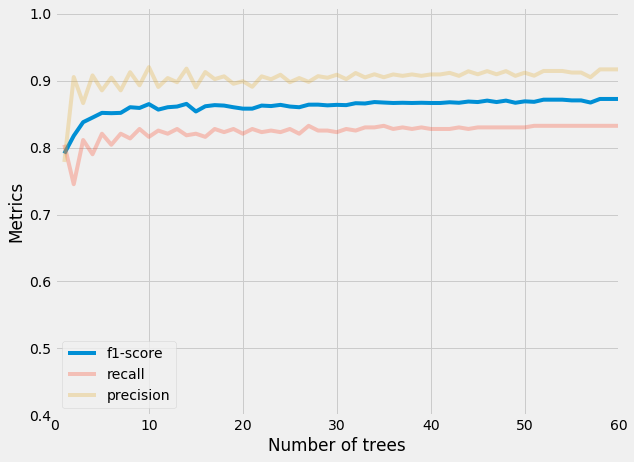

In [25]:
plt.figure(figsize=(9, 7))
x_uni = list(range(1, 61))
plt.plot(x_uni, list_f1score5, label='f1-score')
plt.plot(x_uni, list_recall5, label='recall', alpha=0.3)
plt.plot(x_uni, list_precision5, label='precision', alpha=0.3)
plt.axis([0, 60, 0.4, 1.01])
plt.xlabel('Number of trees')
plt.ylabel('Metrics')
plt.legend()
plt.show()

With the random forest classifier using entropy, running from 1 sub-tree to 60 sub-trees, the f1-score appears to increase and level-out after approximately 22. With 34 trees in our model, we achieve an f1-score of **0.866** and a recall score of **0.830**.  

The confusion matrix shows that the model has classified **350 observations correctly as positive** pulsar examples, **4,017 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **74 observations falsely predicted as negative,** and **34 observations falsely predicted as positive.**  

In [26]:
print(list_f1score5[32]) 
print(list_recall5[32])

0.8659286592865929
0.8301886792452831


In [27]:
print(list_confusion5[32])

[[4017   34]
 [  74  350]]


### Model 6: Random forest (gini)
- criterion: **Gini** (as a measure of impurity)
- max no. of features considered when looking for best split: log<sub>2</sub>(n_features)
- no maximum limit on leaf nodes
- minimum impurity decrease: 0.0
- bootstrap: True (bootstrap aggregation is part of our random forest algorithm)
- random state: 123 (allows us to replicate the random initial state)

In [28]:
list_f1score6 = []
list_recall6 = []
list_precision6 = []
list_confusion6 = {}

for i in range(1, 61):
    rf_classifier_gini = RandomForestClassifier(n_estimators=i, 
                                                criterion='gini', 
                                                max_depth=None, 
                                                min_samples_split=2, 
                                                min_samples_leaf=1, 
                                                min_weight_fraction_leaf=0.0, 
                                                max_features='log2', 
                                                bootstrap=True, 
                                                random_state=123)
    rf_classifier_gini.fit(X_train, Y_train)
    y_hat6 = rf_classifier_gini.predict(X_test)
    list_f1score6.append(f1_score(Y_test, y_hat6))
    list_recall6.append(recall_score(Y_test, y_hat6))
    list_precision6.append(precision_score(Y_test, y_hat6))
    list_confusion6[i] = confusion_matrix(Y_test, y_hat6)

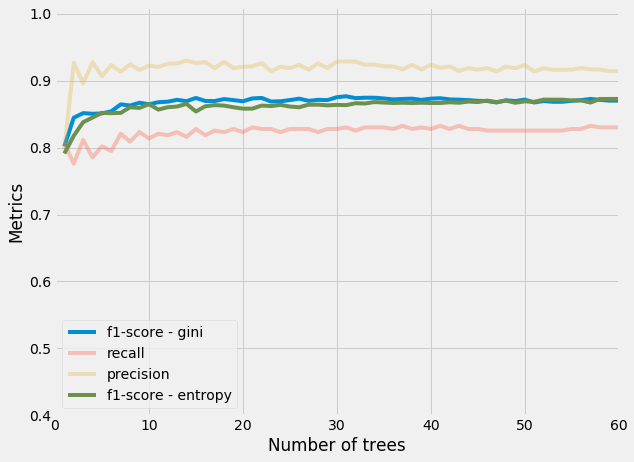

In [30]:
plt.figure(figsize=(9, 7))
plt.plot(x_uni, list_f1score6, label='f1-score - gini')
plt.plot(x_uni, list_recall6, label='recall', alpha=0.3)
plt.plot(x_uni, list_precision6, label='precision', alpha=0.3)
plt.plot(x_uni, list_f1score5, label='f1-score - entropy')
plt.axis([0, 60, 0.4, 1.01])
plt.xlabel('Number of trees')
plt.ylabel('Metrics')
plt.legend()
plt.show()

With the random forest classifier using the gini index, running from 1 sub-tree to 60 sub-trees, the f1-score appears to increase and level-out after approximately 31. With 31 trees in our model, we achieve an f1-score of **0.877** and a recall score of **0.830**. This model has slightly out-performed the model 5 random forest above.  

The confusion matrix shows that the model has classified **351 observations correctly as positive** pulsar examples, **4,024 observations correctly as negative** spurious examples, when being tested on out-of-sample data. There are also **73 observations falsely predicted as negative,** and **27 observations falsely predicted as positive.**  

In [34]:
print(list_f1score6[30]) #31 trees, index 30
print(list_recall6[30])

0.8767123287671234
0.8301886792452831


In [35]:
print(list_confusion6[30])

[[4024   27]
 [  73  351]]


## Results and Findings
<hr>
### The Confusion Matrix:  
```
Neural Network (3 layers):        Random Forest (31 trees):

[[4005   46]                      [[4024   27]
 [  58  366]]                      [  73  351]]
```

According to the confusion matrix, neural network model 3 has **correctly labeled 366** pulsars and **correctly rejected 4,005** negative observations of radio frequency interference (RFI) or noise, with out-of-sample data.

The model has also incorrectly labeled **58** observations as negative. However, out of **4,475** testing observations, missing 58 pulsar candidates is a promising result, _showing a high degree of sensitivity_.  

The model has also incorrectly labeled **46** observations as pulsars, showing a _relatively high degree of precision **(0.89)**_. With the 3 layer configuration, we achieve an **f1-score of 0.8795** and a **recall of 0.8656** with 3 neurons at layer 3.  

As a comparison, the random forest classifier using the gini index incorrectly labeled **73** observations as negative. The neural network has shown a higher degree of sensitivity with this problem, as it has learned how to discern a fewer number of false negatives. Missing 15 pulsar candidates with this testing dataset is a large number of the total positive observations. The random forest has performed relatively well, given that the training time was significantly shorter, however the extra positive predictive performance of the neural network has shown to be very valuable with this problem, with its relatively small number of positive observations.  


### Characteristics of Our Best Model:
- **Model 3**
- Input: 8 input nodes
- Layer 1: 9 neurons - Activation function: ReLU
- Layer 2: 8 neurons - Activation function: ReLU
- Layer 3: 3 neurons - Activation function: ReLU
- Output: 1 neuron - Activation function: sigmoid
- Optimization: Adam 
- Loss function: Cross Entropy
- **Recall: 0.8656** 
- **F1-score: 0.8795**  

### F1-Score Comparison:

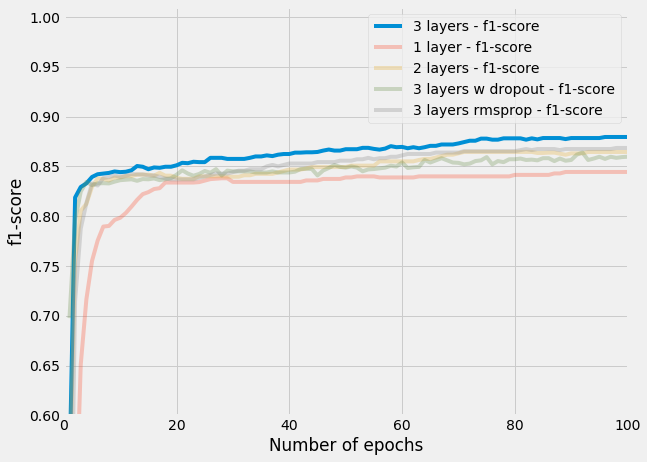

In [55]:
plt.figure(figsize=(9, 7))
plt.plot(x_units, metrics3.val_f1s, label='3 layers - f1-score')
plt.plot(x_units, metrics1.val_f1s, label='1 layer - f1-score', alpha=0.3)
plt.plot(x_units, metrics2.val_f1s, label='2 layers - f1-score', alpha=0.3)
plt.plot(x_units, metrics4.val_f1s, label='3 layers w dropout - f1-score', alpha=0.3)
plt.plot(x_units, metrics5.val_f1s, label='3 layers rmsprop - f1-score', alpha=0.3)
plt.axis([0, 100, 0.6, 1.01])
plt.xlabel('Number of epochs')
plt.ylabel('f1-score')
plt.legend()
plt.show()

There is a marked increase in learning speed with model 3, as the convergence appears to happen between epoch 80 to 100. We see that the initial increase in our metrics occurrs immediately within the first few training epochs, then appears to converge at its maximum shortly after epoch 80. Model 3 appears to reach a top f1-score of 0.88 at epoch 95, with a top recall score of 0.865. 

### The ROC Curve:

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
x, y, _ = roc_curve(Y_test, y_hat3)
auc = roc_auc_score(Y_test, y_hat3)

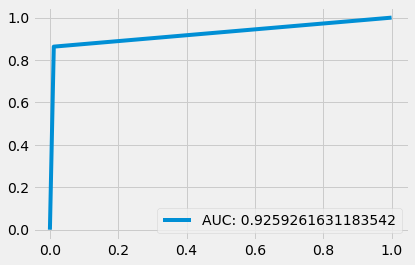

In [37]:
plt.plot(x, y, label='AUC: '+str(auc))
plt.legend()
plt.show()

The ROC curve shows relatively strong performance, with a relatively small neural network of 20 hidden perceptrons, we still have a robust model producing a high true positive rate. The area under the curve is 0.92593. 

In [38]:
print(classification_report(Y_test, y_hat3))

             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4051
          1       0.89      0.86      0.88       424

avg / total       0.98      0.98      0.98      4475



- The classification report shows model 3 with a precision of 0.89, recall of 0.86, and an **f1-score of 0.88**, and an average precision of 0.98, average recall of 0.98, and an average f1-score of 0.98. 

In summary, our third model with 3 hidden layers (9, 8, 3) and associated parameters has been able to discern, **out of 4,475 out-of-sample observations, 366 pulsar examples correctly, and only miss 58 candidates**. This is a promising result, as the vast majority of the data from the High Time Resolution Universe Pulsar Survey is RFI and noise. We purposely put greater weight on having a high recall score over accuracy, as with this problem and its relatively rare hit-rate, required a high true positive rate.  

**The labels are encoded as:**  
- 0 Spurious noise or RFI
- 1 Pulsar

**Projecting the variance of 8 dimensions onto 2 principal components and viewing the 2 labels:** 

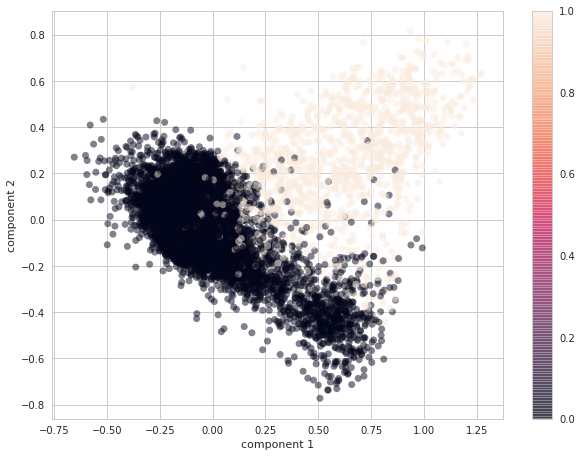

In [54]:
pca_2 = PCA(n_components=2, random_state=123)
pca_2.fit(X_train)
p2 = pca_2.transform(X_train)
sns.set(style='whitegrid')
plt.figure(figsize=(9, 7))
plt.scatter(p2[:, 0], p2[:, 1], c=Y_train, edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();